
Running Experiment 1 with α=0.1, γ=0.7, ε=0.3

Running Experiment 2 with α=0.2, γ=0.8, ε=0.2

Running Experiment 3 with α=0.3, γ=0.9, ε=0.1

Running Experiment 4 with α=0.2, γ=0.95, ε=0.2

Running Experiment 5 with α=0.15, γ=0.85, ε=0.25

Running Experiment 6 with α=0.25, γ=0.75, ε=0.15


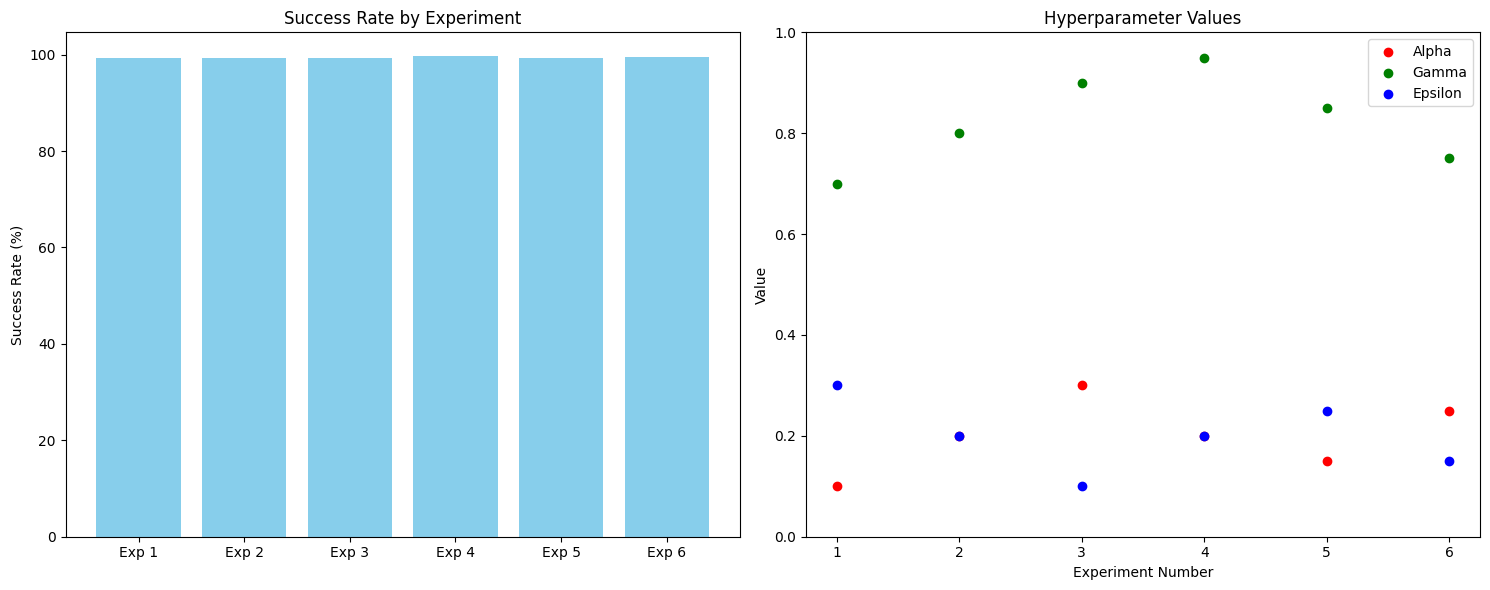

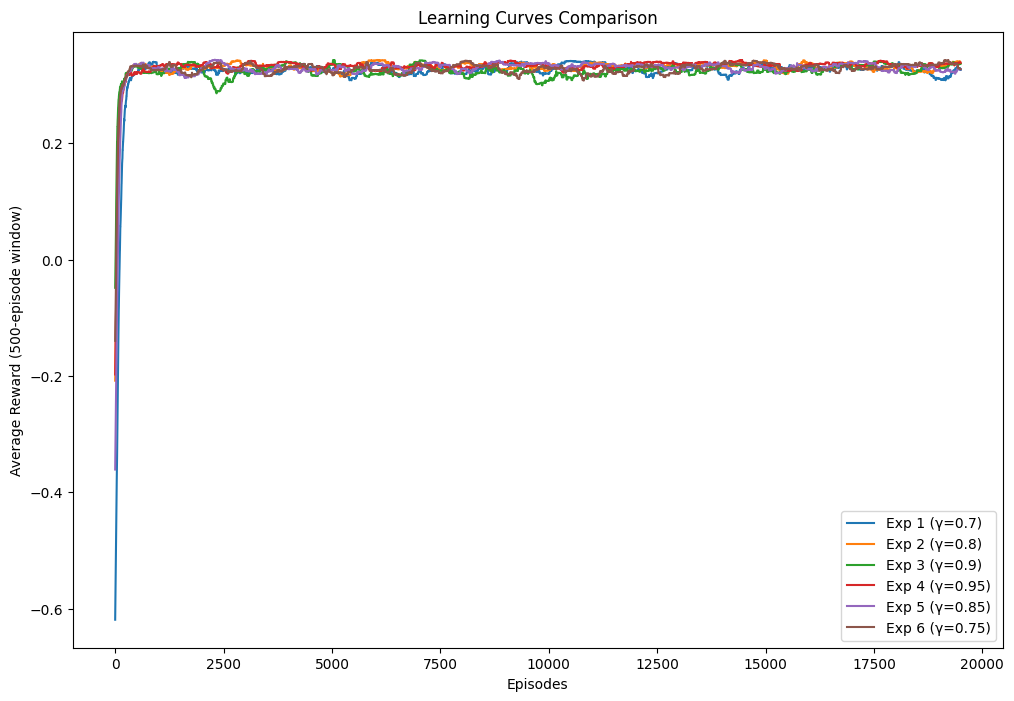


Learned Policy:

↓ ↓ ↓ → ↓ → → ↓
↓ ↓ ↓ ↓ ↓ → → ↓
→ → ↓ ↓ ← ← → ↓
→ → ↓ ↓ ← → → ↓
↓ ← → ↓ ↓ ↑ ← ↓
↓ ← → → ↓ ← ← ↓
↓ ← ← → → ↓ ↓ ↓
→ → → → → → → ←

Learned Policy:

→ → ↓ ↓ → → → ↓
→ → ↓ ↓ ↑ → ↓ ↓
↓ ↓ → ↓ ← ← → ↓
→ → → ↓ ← ↓ → ↓
↑ ← → ↓ ↓ ↑ ← ↓
↓ ← → ↓ ↓ ← ← ↓
↓ ← ← → ↓ ↓ ↓ ↓
→ → → → → → → ←

Learned Policy:

↓ ↓ ↓ ↓ → ← ↓ ←
↓ → ↓ ↓ ↓ → ↑ ↓
→ → ↓ ↓ ↑ ← → ↓
↑ → ↓ ↓ ← ↓ → ↓
↓ ← → ↓ ↓ ← ← ↓
↓ ← → ↓ ↓ ← ← ↓
↓ ← ← → → → ↓ ←
→ → → → → → → ←

Learned Policy:

→ ↓ ↓ ↓ ↓ → → ↓
↓ ↓ ↓ ↓ → ↑ ← ↓
→ → ↓ ↓ ↑ ← → ↓
→ → ↓ ↓ ← → → ↓
↑ ← → ↓ ↓ ↑ ← ↓
↑ ← → ↓ ↓ ← ← ↓
↓ ← ← → ↓ → ↓ ↓
→ → → → → → → ←

Learned Policy:

↓ ↓ ↓ ↓ → → ← ↓
→ ↓ ↓ ↓ → → ↓ ↓
→ → ↓ ↓ ← ← → ↓
→ → → ↓ ← ↓ → ↓
↓ ← → ↓ ↓ ← ← ↓
↑ ← → ↓ ↓ ← ← ↓
↓ ← ← → ↓ → ↓ ↓
→ → → → → → → ←

Learned Policy:

↓ ↓ ↓ ↓ → → ↓ ↓
↓ ↓ ↓ ↓ ↑ → → ↓
→ → ↓ ↓ ← ← → ↓
→ → ↓ ↓ ← ↓ → ↓
↓ ← → → ↓ ← ← ↓
↓ ← → ↓ ↓ ← ← ↓
↓ ← ← → ↓ ↓ ← ↓
→ → → → → → → ←


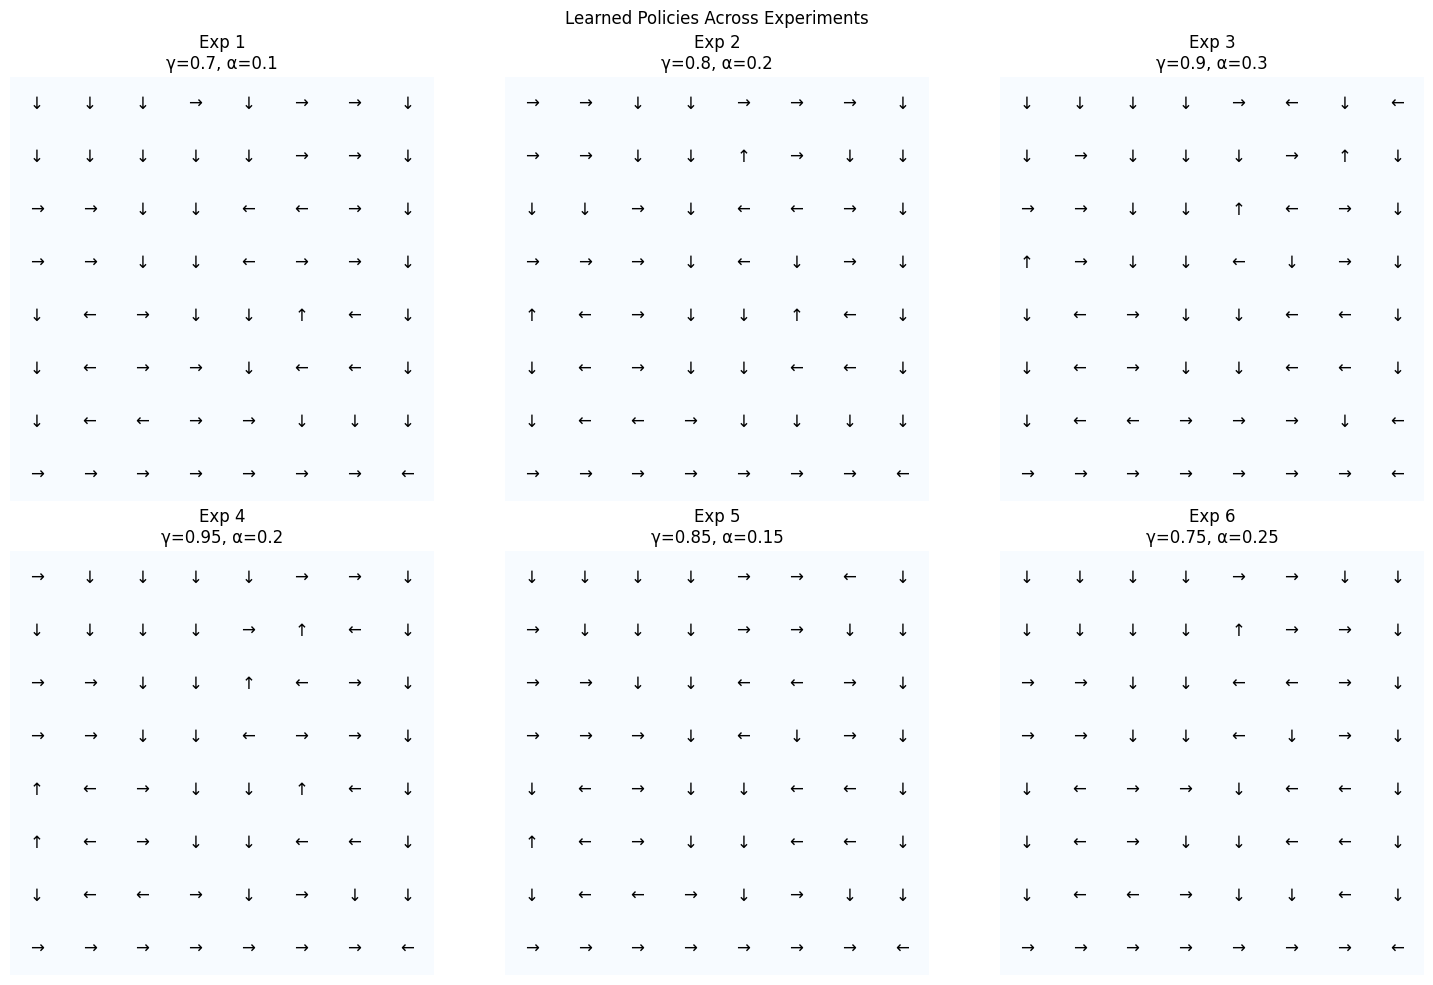


Experimental Results:
   Alpha  Gamma  Epsilon  Success Rate
3   0.20   0.95     0.20         99.64
5   0.25   0.75     0.15         99.48
1   0.20   0.80     0.20         99.40
2   0.30   0.90     0.10         99.34
4   0.15   0.85     0.25         99.34
0   0.10   0.70     0.30         99.24


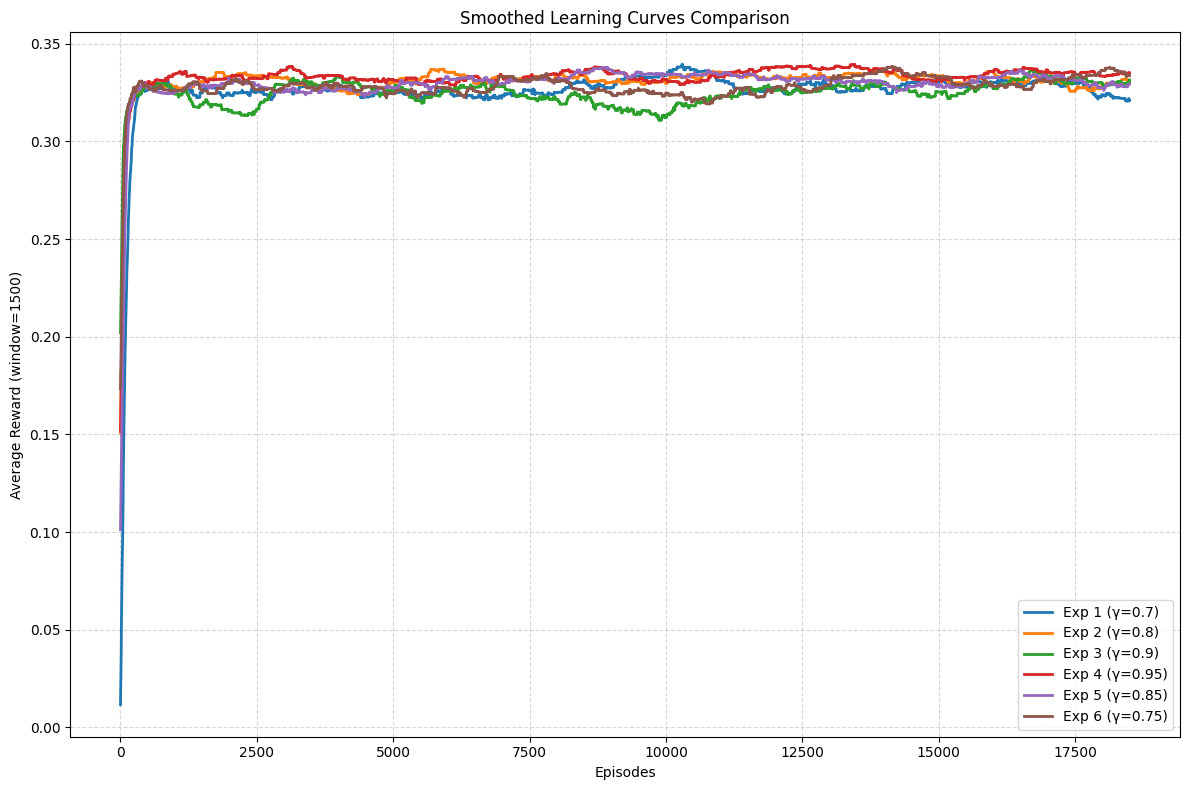

In [4]:
import gymnasium as gym
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import random

class CustomFrozenLakeEnv(gym.Env):
    """Custom FrozenLake with 4 actions (← ↓ → ↑) and improved boundary handling"""
    def __init__(self, size=8, is_slippery=False):
        super().__init__()
        self.size = size
        self.is_slippery = is_slippery
        self.action_space = gym.spaces.Discrete(4)  # 4 actions
        self.observation_space = gym.spaces.Discrete(size * size)
        self.lake_map = self.generate_map()
        self.state = self.find_start()

        # Define movement changes
        self.moves = {
            0: (0, -1),   # Left (←)
            1: (1, 0),    # Down (↓)
            2: (0, 1),    # Right (→)
            3: (-1, 0)    # Up (↑)
        }

    def generate_map(self):
        """Generate an 8x8 FrozenLake with random holes"""
        lake = np.full((self.size, self.size), 'F')
        lake[0, 0] = 'S'
        lake[7,7] = 'G'

        for _ in range(int(self.size * 1.5)):
            x, y = np.random.randint(1, self.size - 1), np.random.randint(1, self.size - 1)
            lake[x, y] = 'H'

        return lake

    def find_start(self):
        """Find the starting position"""
        for i in range(self.size):
            for j in range(self.size):
                if self.lake_map[i, j] == 'S':
                    return i * self.size + j
        return 0

    def step(self, action):
        """Performs an action while ensuring the agent does not move outside the grid"""
        row, col = divmod(self.state, self.size)
        move_r, move_c = self.moves[action]
        new_row, new_col = row + move_r, col + move_c

        # Check if move is valid (inside the grid)
        if 0 <= new_row < self.size and 0 <= new_col < self.size:
            self.state = new_row * self.size + new_col
            reward = -0.05  # Small penalty to encourage movement
            if self.lake_map[new_row, new_col] == 'G':
                reward = 1
            elif self.lake_map[new_row, new_col] == 'H':
                reward = -1
        else:
            reward = -0.2  # Stronger penalty for trying to move out of bounds
            new_row, new_col = row, col  # Stay in place if out of bounds

        terminated = self.lake_map[new_row, new_col] in ['G', 'H']
        return self.state, reward, terminated, {}

    def reset(self, seed=None):
        """Reset environment"""
        self.state = self.find_start()
        return self.state, {}

    def render(self):
        """Render the grid"""
        grid = np.copy(self.lake_map)
        row, col = divmod(self.state, self.size)
        grid[row, col] = 'A'
        for row in grid:
            print(" ".join(row))
        print()


class QLearningAgent:
    def __init__(self, env, alpha, gamma, epsilon, episodes):
        self.env = env
        self.alpha = alpha
        self.gamma = gamma
        self.epsilon = epsilon
        self.episodes = episodes

        self.state_num = env.observation_space.n
        self.action_num = env.action_space.n

        self.Q_table = np.zeros((self.state_num, self.action_num))
        self.policy = np.zeros(self.state_num, dtype=int)
        self.rewards_per_episode = []
        self.success_rates = []

    def select_action(self, state):
        """Epsilon-greedy action selection"""
        if np.random.random() < self.epsilon:
            return np.random.choice(self.action_num)
        else:
            return np.argmax(self.Q_table[state])

    def train(self):
        """Q-learning training"""
        successful_episodes = 0

        for episode in range(self.episodes):
            state, _ = self.env.reset()
            terminated = False
            total_reward = 0

            while not terminated:
                action = self.select_action(state)
                new_state, reward, terminated, _ = self.env.step(action)

                # Q-learning update
                self.Q_table[state, action] += self.alpha * (
                    reward + self.gamma * np.max(self.Q_table[new_state]) - self.Q_table[state, action]
                )

                state = new_state
                total_reward += reward

            self.rewards_per_episode.append(total_reward)

            if total_reward > 0:
                successful_episodes += 1

            if (episode + 1) % 500 == 0:
                self.success_rates.append(successful_episodes / 500)
                successful_episodes = 0

            # Adjust epsilon dynamically
            self.epsilon = max(self.epsilon * 0.995, 0.01)

    def compute_policy(self):
        """Extract best policy"""
        for state in range(self.state_num):
            self.policy[state] = np.argmax(self.Q_table[state])

    def render_policy(self):
        """Print policy"""
        action_symbols = {0: "←", 1: "↓", 2: "→", 3: "↑"}
        policy_grid = np.array([action_symbols[action] for action in self.policy]).reshape(self.env.size, self.env.size)
        print("\nLearned Policy:\n")
        for row in policy_grid:
            print(" ".join(row))
        return policy_grid


def run_experiments(env, experiments, episodes):
    """Runs multiple Q-learning experiments"""
    results = []
    agents = []
    all_rewards = []

    for i, params in enumerate(experiments):
        print(f"\nRunning Experiment {i+1} with α={params['alpha']}, γ={params['gamma']}, ε={params['epsilon']}")

        agent = QLearningAgent(env, params["alpha"], params["gamma"], params["epsilon"], episodes)
        agent.train()
        agent.compute_policy()

        # Store results
        success_rate = np.mean(agent.success_rates[-10:]) * 100
        results.append([params["alpha"], params["gamma"], params["epsilon"], success_rate])
        agents.append(agent)
        all_rewards.append(agent.rewards_per_episode)

    return pd.DataFrame(results, columns=["Alpha", "Gamma", "Epsilon", "Success Rate"]), agents, all_rewards


# Hyperparameter experiments
experiments = [
    {"alpha": 0.1, "gamma": 0.7, "epsilon": 0.3},
    {"alpha": 0.2, "gamma": 0.8, "epsilon": 0.2},
    {"alpha": 0.3, "gamma": 0.9, "epsilon": 0.1},
    {"alpha": 0.2, "gamma": 0.95, "epsilon": 0.2},
    {"alpha": 0.15, "gamma": 0.85, "epsilon": 0.25},
    {"alpha": 0.25, "gamma": 0.75, "epsilon": 0.15}
]

# Create environment
env = CustomFrozenLakeEnv(size=8, is_slippery=False)

# Run experiments
results_df, agents, all_rewards = run_experiments(env, experiments, episodes=20000)

# Visualization 1: Hyperparameter Comparison
plt.figure(figsize=(15, 6))

# Success Rate Comparison
plt.subplot(1, 2, 1)
plt.bar(range(len(experiments)), results_df["Success Rate"], color='skyblue')
plt.xticks(range(len(experiments)), [f"Exp {i+1}" for i in range(len(experiments))])
plt.ylabel("Success Rate (%)")
plt.title("Success Rate by Experiment")

# Hyperparameter Values
plt.subplot(1, 2, 2)
for i, (alpha, gamma, epsilon) in enumerate(zip(results_df["Alpha"], results_df["Gamma"], results_df["Epsilon"])):
    plt.scatter(i+1, alpha, color='red', label='Alpha' if i==0 else "")
    plt.scatter(i+1, gamma, color='green', label='Gamma' if i==0 else "")
    plt.scatter(i+1, epsilon, color='blue', label='Epsilon' if i==0 else "")
plt.legend()
plt.title("Hyperparameter Values")
plt.xlabel("Experiment Number")
plt.ylabel("Value")
plt.ylim(0, 1)
plt.tight_layout()
plt.show()

# Visualization 2: Learning Curves
plt.figure(figsize=(12, 8))
for i, rewards in enumerate(all_rewards):
    window = 500
    moving_avg = np.convolve(rewards, np.ones(window)/window, mode='valid')
    plt.plot(moving_avg, label=f"Exp {i+1} (γ={experiments[i]['gamma']})")
plt.xlabel("Episodes")
plt.ylabel("Average Reward (500-episode window)")
plt.title("Learning Curves Comparison")
plt.legend()
plt.show()

# Visualization 3: Policy Maps
plt.figure(figsize=(15, 10))
for i, agent in enumerate(agents):
    plt.subplot(2, 3, i+1)
    policy_grid = agent.render_policy()
    plt.imshow(np.zeros((8, 8)), cmap='Blues')  # Dummy image for grid
    for (j, k), val in np.ndenumerate(policy_grid):
        plt.text(k, j, val, ha='center', va='center', fontsize=12)
    plt.title(f"Exp {i+1}\nγ={experiments[i]['gamma']}, α={experiments[i]['alpha']}")
    plt.axis('off')
plt.suptitle("Learned Policies Across Experiments")
plt.tight_layout()
plt.show()

# Print results table
print("\nExperimental Results:")
print(results_df.sort_values("Success Rate", ascending=False))

# Visualization 2: Smoothed Learning Curves
plt.figure(figsize=(12, 8))
window = 1500  # Increased window size for smoother curves

for i, rewards in enumerate(all_rewards):
    if len(rewards) >= window:
        moving_avg = np.convolve(rewards, np.ones(window)/window, mode='valid')
        plt.plot(moving_avg, linewidth=2, label=f"Exp {i+1} (γ={experiments[i]['gamma']})")

plt.xlabel("Episodes")
plt.ylabel("Average Reward (window=1500)")
plt.title("Smoothed Learning Curves Comparison")
plt.legend()
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


Episode 500, Success Rate: 25.20%
Episode 1000, Success Rate: 96.20%
Episode 1500, Success Rate: 98.80%
Episode 2000, Success Rate: 98.60%
Episode 2500, Success Rate: 98.80%
Episode 3000, Success Rate: 98.40%
Episode 3500, Success Rate: 98.00%
Episode 4000, Success Rate: 98.40%
Episode 4500, Success Rate: 99.20%
Episode 5000, Success Rate: 97.60%
Episode 5500, Success Rate: 98.20%
Episode 6000, Success Rate: 98.60%
Episode 6500, Success Rate: 99.20%
Episode 7000, Success Rate: 99.40%
Episode 7500, Success Rate: 98.20%
Episode 8000, Success Rate: 98.80%
Episode 8500, Success Rate: 99.00%
Episode 9000, Success Rate: 98.60%
Episode 9500, Success Rate: 99.00%
Episode 10000, Success Rate: 97.60%

Learned Policy:

↓ ← → → → → → ↓
↓ ↓ → ← ↑ → → ↓
↓ ← ↓ ↑ ← → ↓ ↓
↓ ↓ ↑ ← ↓ ← ↓ ↓
↓ ← ← ← ↓ ← ↓ ↓
↓ ← ← → ↑ → → ↓
→ → ↓ ↓ ← ← ← ↓
→ → → → → → → ←


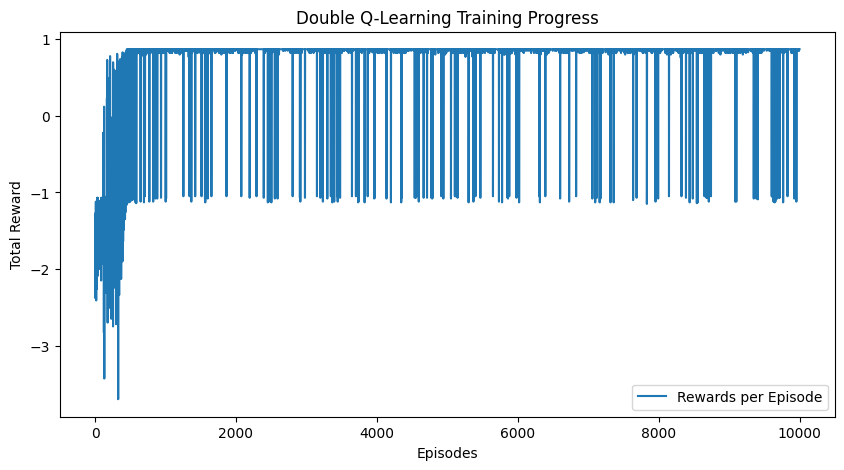

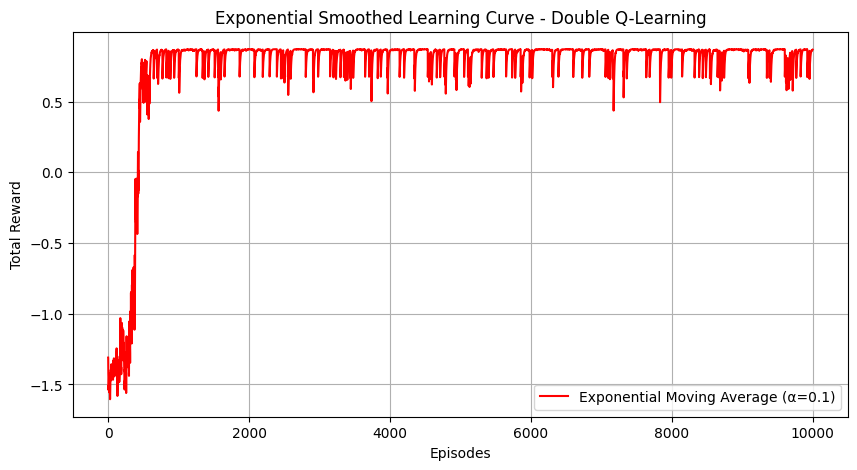

In [4]:
import gymnasium as gym
import numpy as np
import matplotlib.pyplot as plt

class CustomFrozenLakeEnv(gym.Env):
    """Custom FrozenLake with 4 actions (← ↓ → ↑)"""

    def __init__(self, size=8, is_slippery=True):
        super().__init__()
        self.size = size
        self.is_slippery = is_slippery
        self.action_space = gym.spaces.Discrete(4)  # 4 actions
        self.observation_space = gym.spaces.Discrete(size * size)
        self.lake_map = self.generate_map()
        self.state = self.find_start()

        self.moves = {
            0: (0, -1),   # Left (←)
            1: (1, 0),    # Down (↓)
            2: (0, 1),    # Right (→)
            3: (-1, 0)    # Up (↑)
        }

    def generate_map(self):
        """Generate an 8x8 FrozenLake with controlled holes."""
        lake = np.full((self.size, self.size), 'F')
        lake[0, 0] = 'S'
        lake[self.size - 1, self.size - 1] = 'G'

        np.random.seed(42)
        hole_count = int(self.size * 1.5)
        holes = set()

        # Ensure at least one clear path exists
        for _ in range(hole_count):
            x, y = np.random.randint(1, self.size - 1), np.random.randint(1, self.size - 1)
            if (x, y) not in [(0, 0), (self.size - 1, self.size - 1)]:
                holes.add((x, y))

        for x, y in holes:
            lake[x, y] = 'H'

        return lake

    def find_start(self):
        """Find the starting position."""
        return 0

    def step(self, action):
        """Performs an action while ensuring the agent does not move outside the grid."""
        row, col = divmod(self.state, self.size)
        move_r, move_c = self.moves[action]
        new_row, new_col = row + move_r, col + move_c

        if 0 <= new_row < self.size and 0 <= new_col < self.size:
            self.state = new_row * self.size + new_col
            reward = -0.01
            terminated = False

            if self.lake_map[new_row, new_col] == 'G':
                reward = 1
                terminated = True
            elif self.lake_map[new_row, new_col] == 'H':
                reward = -1
                terminated = True
        else:
            reward = -0.05
            terminated = False

        return self.state, reward, terminated, {}

    def reset(self, seed=None):
        """Reset environment."""
        self.state = self.find_start()
        return self.state, {}

    def render(self):
        """Render the grid."""
        grid = np.copy(self.lake_map)
        row, col = divmod(self.state, self.size)
        grid[row, col] = 'A'
        for row in grid:
            print(" ".join(row))
        print()


class DoubleQLearningAgent:
    def __init__(self, env, alpha=0.2, gamma=0.95, epsilon=1.0, epsilon_decay=0.995, episodes=10000):
        self.env = env
        self.alpha = alpha
        self.gamma = gamma
        self.epsilon = epsilon
        self.epsilon_decay = epsilon_decay
        self.episodes = episodes

        self.state_num = env.observation_space.n
        self.action_num = env.action_space.n

        self.Q1 = np.zeros((self.state_num, self.action_num))
        self.Q2 = np.zeros((self.state_num, self.action_num))
        self.policy = np.zeros(self.state_num, dtype=int)
        self.rewards_per_episode = []
        self.success_rates = []

    def select_action(self, state):
        """Epsilon-greedy using combined Q-values."""
        if np.random.random() < self.epsilon:
            return np.random.choice(self.action_num)
        else:
            return np.argmax(self.Q1[state] + self.Q2[state])

    def train(self):
        """Double Q-learning training with improved stability."""
        successful_episodes = 0
        max_steps_per_episode = 1500

        for episode in range(self.episodes):
            state, _ = self.env.reset()
            terminated = False
            total_reward = 0
            step_count = 0

            while not terminated and step_count < max_steps_per_episode:
                action = self.select_action(state)
                new_state, reward, terminated, _ = self.env.step(action)

                if np.random.rand() < 0.5:
                    best_next_action = np.argmax(self.Q1[new_state])
                    target = reward + self.gamma * self.Q2[new_state][best_next_action]
                    self.Q1[state, action] += self.alpha * (target - self.Q1[state, action])
                else:
                    best_next_action = np.argmax(self.Q2[new_state])
                    target = reward + self.gamma * self.Q1[new_state][best_next_action]
                    self.Q2[state, action] += self.alpha * (target - self.Q2[state, action])

                state = new_state
                total_reward += reward
                step_count += 1

            self.rewards_per_episode.append(total_reward)

            if total_reward > 0:
                successful_episodes += 1

            if (episode + 1) % 500 == 0:
                self.success_rates.append(successful_episodes / 500)
                successful_episodes = 0
                print(f"Episode {episode + 1}, Success Rate: {self.success_rates[-1] * 100:.2f}%")

            self.epsilon = max(self.epsilon * self.epsilon_decay, 0.01)

    def compute_policy(self):
        """Combine both Q-tables for final policy."""
        for state in range(self.state_num):
            self.policy[state] = np.argmax(self.Q1[state] + self.Q2[state])

    def render_policy(self):
        """Print policy."""
        action_symbols = {0: "←", 1: "↓", 2: "→", 3: "↑"}
        policy_grid = np.array([action_symbols[action] for action in self.policy]).reshape(self.env.size, self.env.size)
        print("\nLearned Policy:\n")
        for row in policy_grid:
            print(" ".join(row))
        return policy_grid


# Run Experiment
env = CustomFrozenLakeEnv(size=8, is_slippery=True)
agent = DoubleQLearningAgent(env, alpha=0.2, gamma=0.95, epsilon=1.0, episodes=10000)
agent.train()
agent.compute_policy()
agent.render_policy()

# Plot Learning Curve
plt.figure(figsize=(10, 5))
plt.plot(agent.rewards_per_episode, label="Rewards per Episode")
plt.xlabel("Episodes")
plt.ylabel("Total Reward")
plt.title("Double Q-Learning Training Progress")
plt.legend()
plt.show()

def exponential_moving_average(data, alpha=0.1):
    ema = np.zeros_like(data)
    ema[0] = data[0]
    for t in range(1, len(data)):
        ema[t] = alpha * data[t] + (1 - alpha) * ema[t - 1]
    return ema

# Apply EMA smoothing
smoothed_rewards = exponential_moving_average(agent.rewards_per_episode, alpha=0.1)

plt.figure(figsize=(10, 5))
plt.plot(smoothed_rewards, label="Exponential Moving Average (α=0.1)", color='red')
plt.xlabel("Episodes")
plt.ylabel("Total Reward")
plt.title("Exponential Smoothed Learning Curve - Double Q-Learning")
plt.legend()
plt.grid(True)
plt.show()



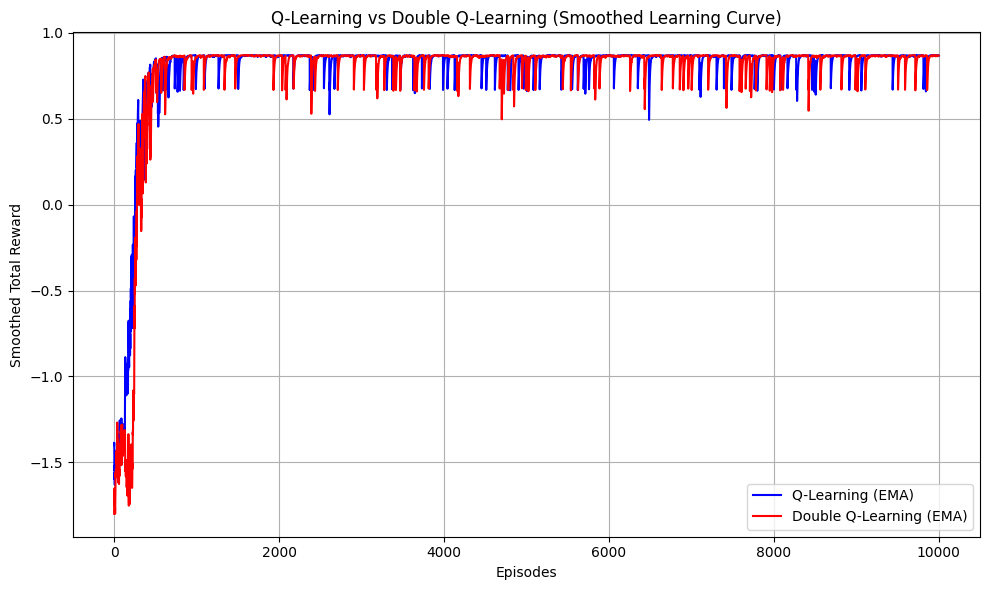

In [5]:
import gymnasium as gym
import numpy as np
import matplotlib.pyplot as plt

# ---------------- Custom FrozenLake Environment ----------------
class CustomFrozenLakeEnv(gym.Env):
    def __init__(self, size=8, is_slippery=True):
        super().__init__()
        self.size = size
        self.is_slippery = is_slippery
        self.action_space = gym.spaces.Discrete(4)
        self.observation_space = gym.spaces.Discrete(size * size)
        self.lake_map = self.generate_map()
        self.state = self.find_start()
        self.moves = {0: (0, -1), 1: (1, 0), 2: (0, 1), 3: (-1, 0)}

    def generate_map(self):
        lake = np.full((self.size, self.size), 'F')
        lake[0, 0] = 'S'
        lake[self.size - 1, self.size - 1] = 'G'
        np.random.seed(42)
        for _ in range(int(self.size * 1.5)):
            x, y = np.random.randint(1, self.size - 1), np.random.randint(1, self.size - 1)
            lake[x, y] = 'H'
        return lake

    def find_start(self):
        return 0

    def step(self, action):
        row, col = divmod(self.state, self.size)
        move_r, move_c = self.moves[action]
        new_row, new_col = row + move_r, col + move_c

        if 0 <= new_row < self.size and 0 <= new_col < self.size:
            self.state = new_row * self.size + new_col
            reward = -0.01
            terminated = False
            if self.lake_map[new_row, new_col] == 'G':
                reward = 1
                terminated = True
            elif self.lake_map[new_row, new_col] == 'H':
                reward = -1
                terminated = True
        else:
            reward = -0.05
            terminated = False

        return self.state, reward, terminated, {}

    def reset(self, seed=None):
        self.state = self.find_start()
        return self.state, {}

# ---------------- Q-Learning Agent ----------------
class QLearningAgent:
    def __init__(self, env, alpha=0.2, gamma=0.95, epsilon=1.0, decay=0.995, episodes=10000):
        self.env = env
        self.alpha = alpha
        self.gamma = gamma
        self.epsilon = epsilon
        self.decay = decay
        self.episodes = episodes
        self.state_num = env.observation_space.n
        self.action_num = env.action_space.n
        self.Q = np.zeros((self.state_num, self.action_num))
        self.rewards = []

    def train(self):
        for _ in range(self.episodes):
            state, _ = self.env.reset()
            done = False
            total_reward = 0

            while not done:
                action = np.random.choice(self.action_num) if np.random.random() < self.epsilon else np.argmax(self.Q[state])
                next_state, reward, done, _ = self.env.step(action)
                self.Q[state, action] += self.alpha * (reward + self.gamma * np.max(self.Q[next_state]) - self.Q[state, action])
                state = next_state
                total_reward += reward

            self.rewards.append(total_reward)
            self.epsilon = max(self.epsilon * self.decay, 0.01)

# ---------------- Double Q-Learning Agent ----------------
class DoubleQLearningAgent:
    def __init__(self, env, alpha=0.2, gamma=0.95, epsilon=1.0, decay=0.995, episodes=10000):
        self.env = env
        self.alpha = alpha
        self.gamma = gamma
        self.epsilon = epsilon
        self.decay = decay
        self.episodes = episodes
        self.state_num = env.observation_space.n
        self.action_num = env.action_space.n
        self.Q1 = np.zeros((self.state_num, self.action_num))
        self.Q2 = np.zeros((self.state_num, self.action_num))
        self.rewards = []

    def train(self):
        for _ in range(self.episodes):
            state, _ = self.env.reset()
            done = False
            total_reward = 0

            while not done:
                action = np.random.choice(self.action_num) if np.random.random() < self.epsilon else np.argmax(self.Q1[state] + self.Q2[state])
                next_state, reward, done, _ = self.env.step(action)

                if np.random.rand() < 0.5:
                    best_action = np.argmax(self.Q1[next_state])
                    target = reward + self.gamma * self.Q2[next_state][best_action]
                    self.Q1[state, action] += self.alpha * (target - self.Q1[state, action])
                else:
                    best_action = np.argmax(self.Q2[next_state])
                    target = reward + self.gamma * self.Q1[next_state][best_action]
                    self.Q2[state, action] += self.alpha * (target - self.Q2[state, action])

                state = next_state
                total_reward += reward

            self.rewards.append(total_reward)
            self.epsilon = max(self.epsilon * self.decay, 0.01)

# ---------------- Smoothing Function ----------------
def exponential_moving_average(data, alpha=0.1):
    ema = np.zeros_like(data)
    ema[0] = data[0]
    for t in range(1, len(data)):
        ema[t] = alpha * data[t] + (1 - alpha) * ema[t - 1]
    return ema

# ---------------- Run & Plot ----------------
env = CustomFrozenLakeEnv(size=8, is_slippery=True)

q_agent = QLearningAgent(env)
q_agent.train()

dq_agent = DoubleQLearningAgent(env)
dq_agent.train()

# Smooth rewards
q_smoothed = exponential_moving_average(q_agent.rewards)
dq_smoothed = exponential_moving_average(dq_agent.rewards)

# Plot
plt.figure(figsize=(10, 6))
plt.plot(q_smoothed, label="Q-Learning (EMA)", color='blue')
plt.plot(dq_smoothed, label="Double Q-Learning (EMA)", color='red')
plt.xlabel("Episodes")
plt.ylabel("Smoothed Total Reward")
plt.title("Q-Learning vs Double Q-Learning (Smoothed Learning Curve)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()
